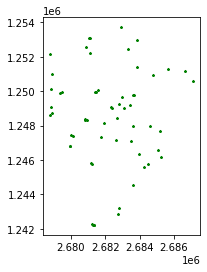

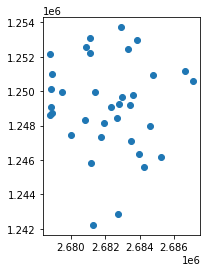

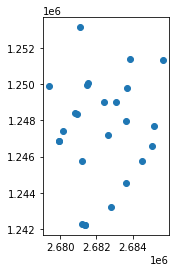

In [18]:
# Imports
import pandas as pd
import geopandas

# Load point data
path_to_data = 'data/alterswohnung_und_alterszentrum.csv'
gdf = geopandas.read_file(path_to_data, GEOM_POSSIBLE_NAMES="geometry", KEEP_GEOM_COLUMNS="NO")

#Check point data
gdf.plot(marker='*', color='green', markersize=5)

# Seperate apartments from dataset
gdf_apartments = gdf['da']=='Alterswohnung'
apartments = gdf[gdf_apartments]
apartments.plot()

# Seperate care centres from dataset
gdf_centres = gdf['da']=='Alterszentren'
centres = gdf[gdf_centres]
centres.plot()

# Load trees
path_to_data = 'Baumstandort.csv'
trees = geopandas.read_file(path_to_data, GEOM_POSSIBLE_NAMES="geometry", KEEP_GEOM_COLUMNS="NO")

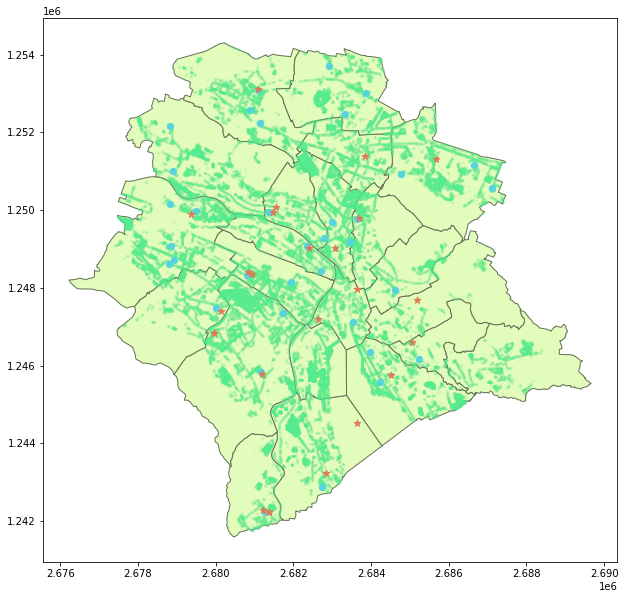

In [22]:
# Load base map
ch = geopandas.read_file('data/stzh.adm_verwaltungsquartiere_a.shp')
base = ch.plot(color='#E2FCBB', edgecolor='#647356', figsize = (15, 10))

# Plot point data on base map
trees.plot(ax=base, color = '#55EB8E', alpha = 0.1, markersize=3)
apartments.plot(ax=base, marker = 'o', color = '#57D3DE', markersize=40, legend = "True")
centres.plot(ax=base, marker = '*', color = '#DE7B57', markersize=50, legend = "True")

import matplotlib.pyplot as plt
plt.savefig('altersheime.jpg')

In [23]:
import bokeh
import json
from bokeh.io import show
from bokeh.models import (CDSView, ColorBar, ColumnDataSource,
                          CustomJS, CustomJSFilter, 
                          GeoJSONDataSource, HoverTool,
                          LinearColorMapper, Slider)
from bokeh.layouts import column, row, widgetbox
from bokeh.palettes import brewer
from bokeh.plotting import figure
# Input GeoJSON source that contains features for plotting
geosource = GeoJSONDataSource(geojson = ch.to_json())
apartmentsource = GeoJSONDataSource(geojson = apartments.to_json())
centresource = GeoJSONDataSource(geojson = centres.to_json())


p = figure(title = 'Altersheime in Zürich', 
           plot_height = 600 ,
           plot_width = 950, 
           toolbar_location = 'below',
           tools = 'pan, wheel_zoom, box_zoom, reset')
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None
# Add patch renderer to figure.
states = p.patches('xs','ys', source = geosource,
                   fill_color = None,
                   line_color = 'gray', 
                   line_width = 0.25, 
                   fill_alpha = 1)
# Create hover tool
p.add_tools(HoverTool(renderers = [states],
                      tooltips = [('Bezirk','@BEZEICHNUNG'),]))
show(p)


In [27]:
# Plots the elderly homes
plot_apartments = p.circle(source = apartmentsource, color = 'red', 
                 size = 5, alpha = 0.3)
plot_centres = p.circle(source = centresource, color = 'blue', 
                 size = 5, alpha = 0.3)
# Add hover tool
p.add_tools(HoverTool(renderers = [plot_apartments],
                      tooltips = [('Name', '@name'),
                                  ('Typ', '@da'),
                                  ]))
# plot, and add it to the current document
layout = column(p)
show(layout)

RuntimeError: Models must be owned by only a single document, GlyphRenderer(id='2710', ...) is already in a doc